In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [4]:
df=pd.read_csv('weather.csv')
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,NW,6.0,...,29,1019.7,1015.0,7,7,14.4,23.6,No,3.6,Yes
1,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,W,4.0,...,36,1012.4,1008.4,5,3,17.5,25.7,Yes,3.6,Yes
2,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,NNE,6.0,...,69,1009.5,1007.2,8,7,15.4,20.2,Yes,39.8,Yes
3,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,W,30.0,...,56,1005.5,1007.0,2,7,13.5,14.1,Yes,2.8,Yes
4,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,ESE,20.0,...,49,1018.3,1018.5,7,7,11.1,15.4,Yes,0.0,No


In [81]:
df.isnull()
df.fillna(method='bfill')



/tmp/ipython-input-81-2954150436.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill')


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,NW,6.0,...,29,1019.7,1015.0,7,7,14.4,23.6,No,3.6,Yes
1,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,W,4.0,...,36,1012.4,1008.4,5,3,17.5,25.7,Yes,3.6,Yes
2,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,NNE,6.0,...,69,1009.5,1007.2,8,7,15.4,20.2,Yes,39.8,Yes
3,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,W,30.0,...,56,1005.5,1007.0,2,7,13.5,14.1,Yes,2.8,Yes
4,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,ESE,20.0,...,49,1018.3,1018.5,7,7,11.1,15.4,Yes,0.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,9.0,30.7,0.0,7.6,12.1,NNW,76.0,SSE,NW,7.0,...,15,1016.1,1010.8,1,3,20.4,30.0,No,0.0,No
362,7.1,28.4,0.0,11.6,12.7,N,48.0,NNW,NNW,2.0,...,22,1020.0,1016.9,0,1,17.2,28.2,No,0.0,No
363,12.5,19.9,0.0,8.4,5.3,ESE,43.0,ENE,ENE,11.0,...,47,1024.0,1022.8,3,2,14.5,18.3,No,0.0,No
364,12.5,26.9,0.0,5.0,7.1,NW,46.0,SSW,WNW,6.0,...,39,1021.0,1016.2,6,7,15.8,25.9,No,0.0,No


In [82]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()


numerical_data = df[numerical_cols]
numerical_data=numerical_data.dropna()


scaler = StandardScaler()
scaler.fit(numerical_data)
scaled_numerical_data = scaler.transform(numerical_data)
print(scaled_numerical_data)
df_scaled_numerical_data = pd.DataFrame(scaled_numerical_data, columns=numerical_data.columns)
print(df_scaled_numerical_data)



[[ 0.04329626  0.50804832 -0.33642144 ...  0.2863087   0.60951025
   0.51505763]
 [ 1.05405587  0.89627737  0.50413386 ...  0.84647549  0.926053
   0.51505763]
 [ 1.00351789  0.37366135  0.50413386 ...  0.46700766  0.09701245
   9.07790884]
 ...
 [ 0.80136597 -0.14895467 -0.33642144 ...  0.30437859 -0.18938338
  -0.33649663]
 [ 0.80136597  0.89627737 -0.33642144 ...  0.53928725  0.95619993
  -0.33649663]
 [ 0.76767398  1.38902961 -0.33642144 ...  1.98487898  1.36318348
  -0.33649663]]
      MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
0    0.043296  0.508048 -0.336421    -0.486513 -0.489801      -0.792879   
1    1.054056  0.896277  0.504134    -0.112973  0.481268      -0.106492   
2    1.003518  0.373661  0.504134     0.409982 -1.346627       3.401706   
3    0.936134 -0.805958  8.956384     0.932938  0.309903       1.037486   
4   -0.024088 -0.716366  0.317344     0.335275  0.738315       0.732425   
..        ...       ...       ...          ...       ...    

In [83]:
df_scaled_numerical_data



,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
0,0.043296,0.508048,-0.336421,-0.486513,-0.489801,-0.792879,-0.566006,0.203522,-0.239179,-0.904853,0.052200,-0.236968,1.041777,1.132907,0.286309,0.609510,0.515058
1,1.054056,0.896277,0.504134,-0.112973,0.481268,-0.106492,-0.822428,-0.133059,0.686493,-0.482674,-1.036540,-1.258655,0.368471,-0.377636,0.846475,0.926053,0.515058
2,1.003518,0.373661,0.504134,0.409982,-1.346627,3.401706,-0.566006,-1.367192,0.840771,1.507599,-1.469053,-1.444417,1.378430,1.132907,0.467008,0.097012,9.077909
3,0.936134,-0.805958,8.956384,0.932938,0.309903,1.037486,2.511065,0.652298,-0.702015,0.723552,-2.065623,-1.475377,-0.641488,1.132907,0.123680,-0.822469,0.325823
4,-0.024088,-0.716366,0.317344,0.335275,0.738315,0.732425,1.228952,1.101074,-0.239179,0.301373,-0.156600,0.304835,1.041777,1.132907,-0.309998,-0.626514,-0.336497
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,0.211756,1.463689,-0.336421,1.082354,1.166728,2.715320,-0.437795,3.569340,-2.553358,-1.749211,-0.484713,-0.887133,-0.978141,-0.377636,1.370502,1.574212,-0.336497
324,-0.108318,1.120256,-0.336421,2.576512,1.338093,0.579894,-1.078851,0.091329,-2.013383,-1.327032,0.096943,0.057154,-1.314794,-1.132907,0.792266,1.302890,-0.336497
325,0.801366,-0.148955,-0.336421,1.381185,-0.775410,0.198569,0.075050,-1.030610,-0.624875,0.180750,0.693512,0.970480,-0.304835,-0.755271,0.304379,-0.189383,-0.336497
326,0.801366,0.896277,-0.336421,0.111151,-0.261314,0.427364,-0.566006,1.101074,-0.162040,-0.301740,0.246085,-0.051207,0.705124,1.132907,0.539287,0.956200,-0.336497


In [84]:
df_scaled_numerical_data
df_scaled_numerical_data.isnull()
df_scaled_numerical_data.fillna(method='bfill')
df_scaled_numerical_data.fillna(method='ffill')
final_data=df_scaled_numerical_data.dropna()
numerical_data['MaxTemp']

/tmp/ipython-input-84-3529968623.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_scaled_numerical_data.fillna(method='bfill')
/tmp/ipython-input-84-3529968623.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_scaled_numerical_data.fillna(method='ffill')


,MaxTemp
0,24.3
1,26.9
2,23.4
3,15.5
4,16.1
...,...
361,30.7
362,28.4
363,19.9
364,26.9


In [86]:
from sklearn.decomposition import PCA
pca=PCA(n_components=1)
pca.fit(final_data)
pca_data=pca.transform(final_data)
pca_data.shape
dataset=pd.DataFrame(pca_data)
df1 = pd.concat([
    numerical_data['MaxTemp'].reset_index(drop=True),
    dataset.reset_index(drop=True)
], axis=1)

df1


,MaxTemp,0
0,24.3,0.270727
1,26.9,1.935492
2,23.4,1.215266
3,15.5,1.089083
4,16.1,-0.529717
...,...,...
323,30.7,4.401072
324,28.4,3.518458
325,19.9,0.371609
326,26.9,1.125518


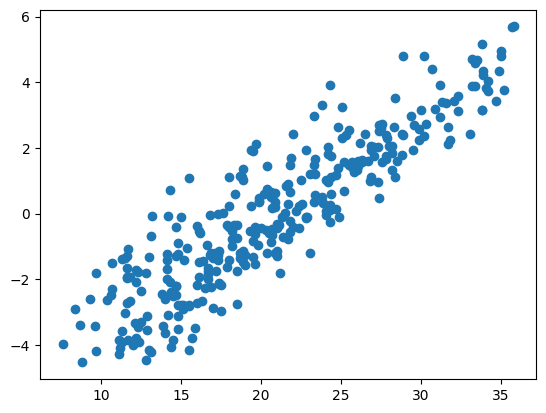

In [87]:
plt.scatter(df1['MaxTemp'],dataset[0])
plt.show()

In [88]:
y=np.array(df1['MaxTemp']).reshape(-1,1)
x=np.array(df1[0]).reshape(-1,1)
print(len(x), len(y))


328 328


In [89]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
model=LinearRegression()
model.fit(x_train,y_train)


LinearRegression()

In [99]:
import numpy as np
y_pred = model.predict(np.array([[0.270727]]))
print(y_pred)


[[21.60004462]]


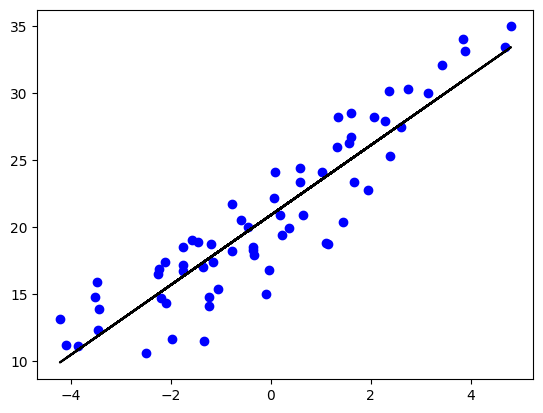

In [91]:
plt.scatter(x_test,y_test,color='blue')
plt.plot(x_test,y_pred,color='black')

In [95]:
accuracy = model.score(x_test, y_test)
print("Model Accuracy (R² Score):", accuracy)

Model Accuracy (R² Score): 0.8393097645483831
